In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
# Imports files from google colab
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR (2).csv


In [3]:
# Reading the csv file using pandas
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [4]:
# Shows the first five rows of the df
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
# shows the last five rows of the df
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
df.shape # Displays the shape of df

(1436, 11)

In [7]:
df.size # Displays the size of df

15796

In [8]:
df.info() # Displays the information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


##Exploratory Data Analysis

Missing Values


In [9]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


Duplicates

In [10]:
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col # displays the numerical columns

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

In [15]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col # displays the categorical columns

['Fuel_Type']

Outlier detection



In [16]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


<Axes: >

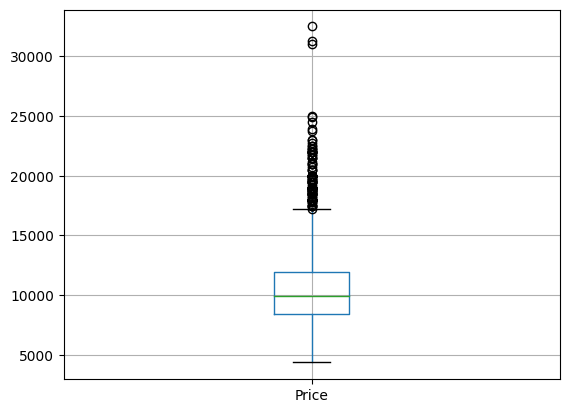

In [17]:
df.boxplot('Price')


In [18]:
df_no_outliers=df[(df['Price']>=lower_bound) & (df['Price']<=upper_bound)]
df_no_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: >

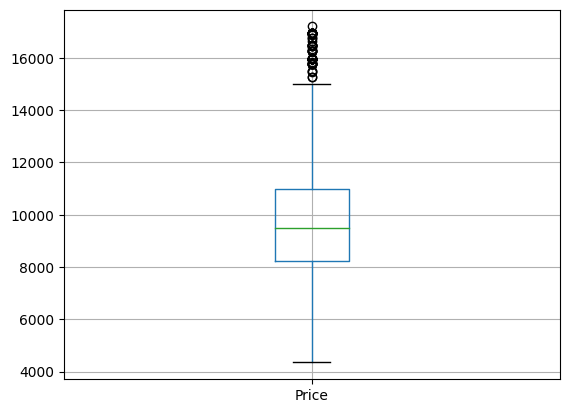

In [19]:
df_no_outliers.boxplot('Price')

Statistical summary

In [20]:
df.describe() # Statistical summary

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


Visualization

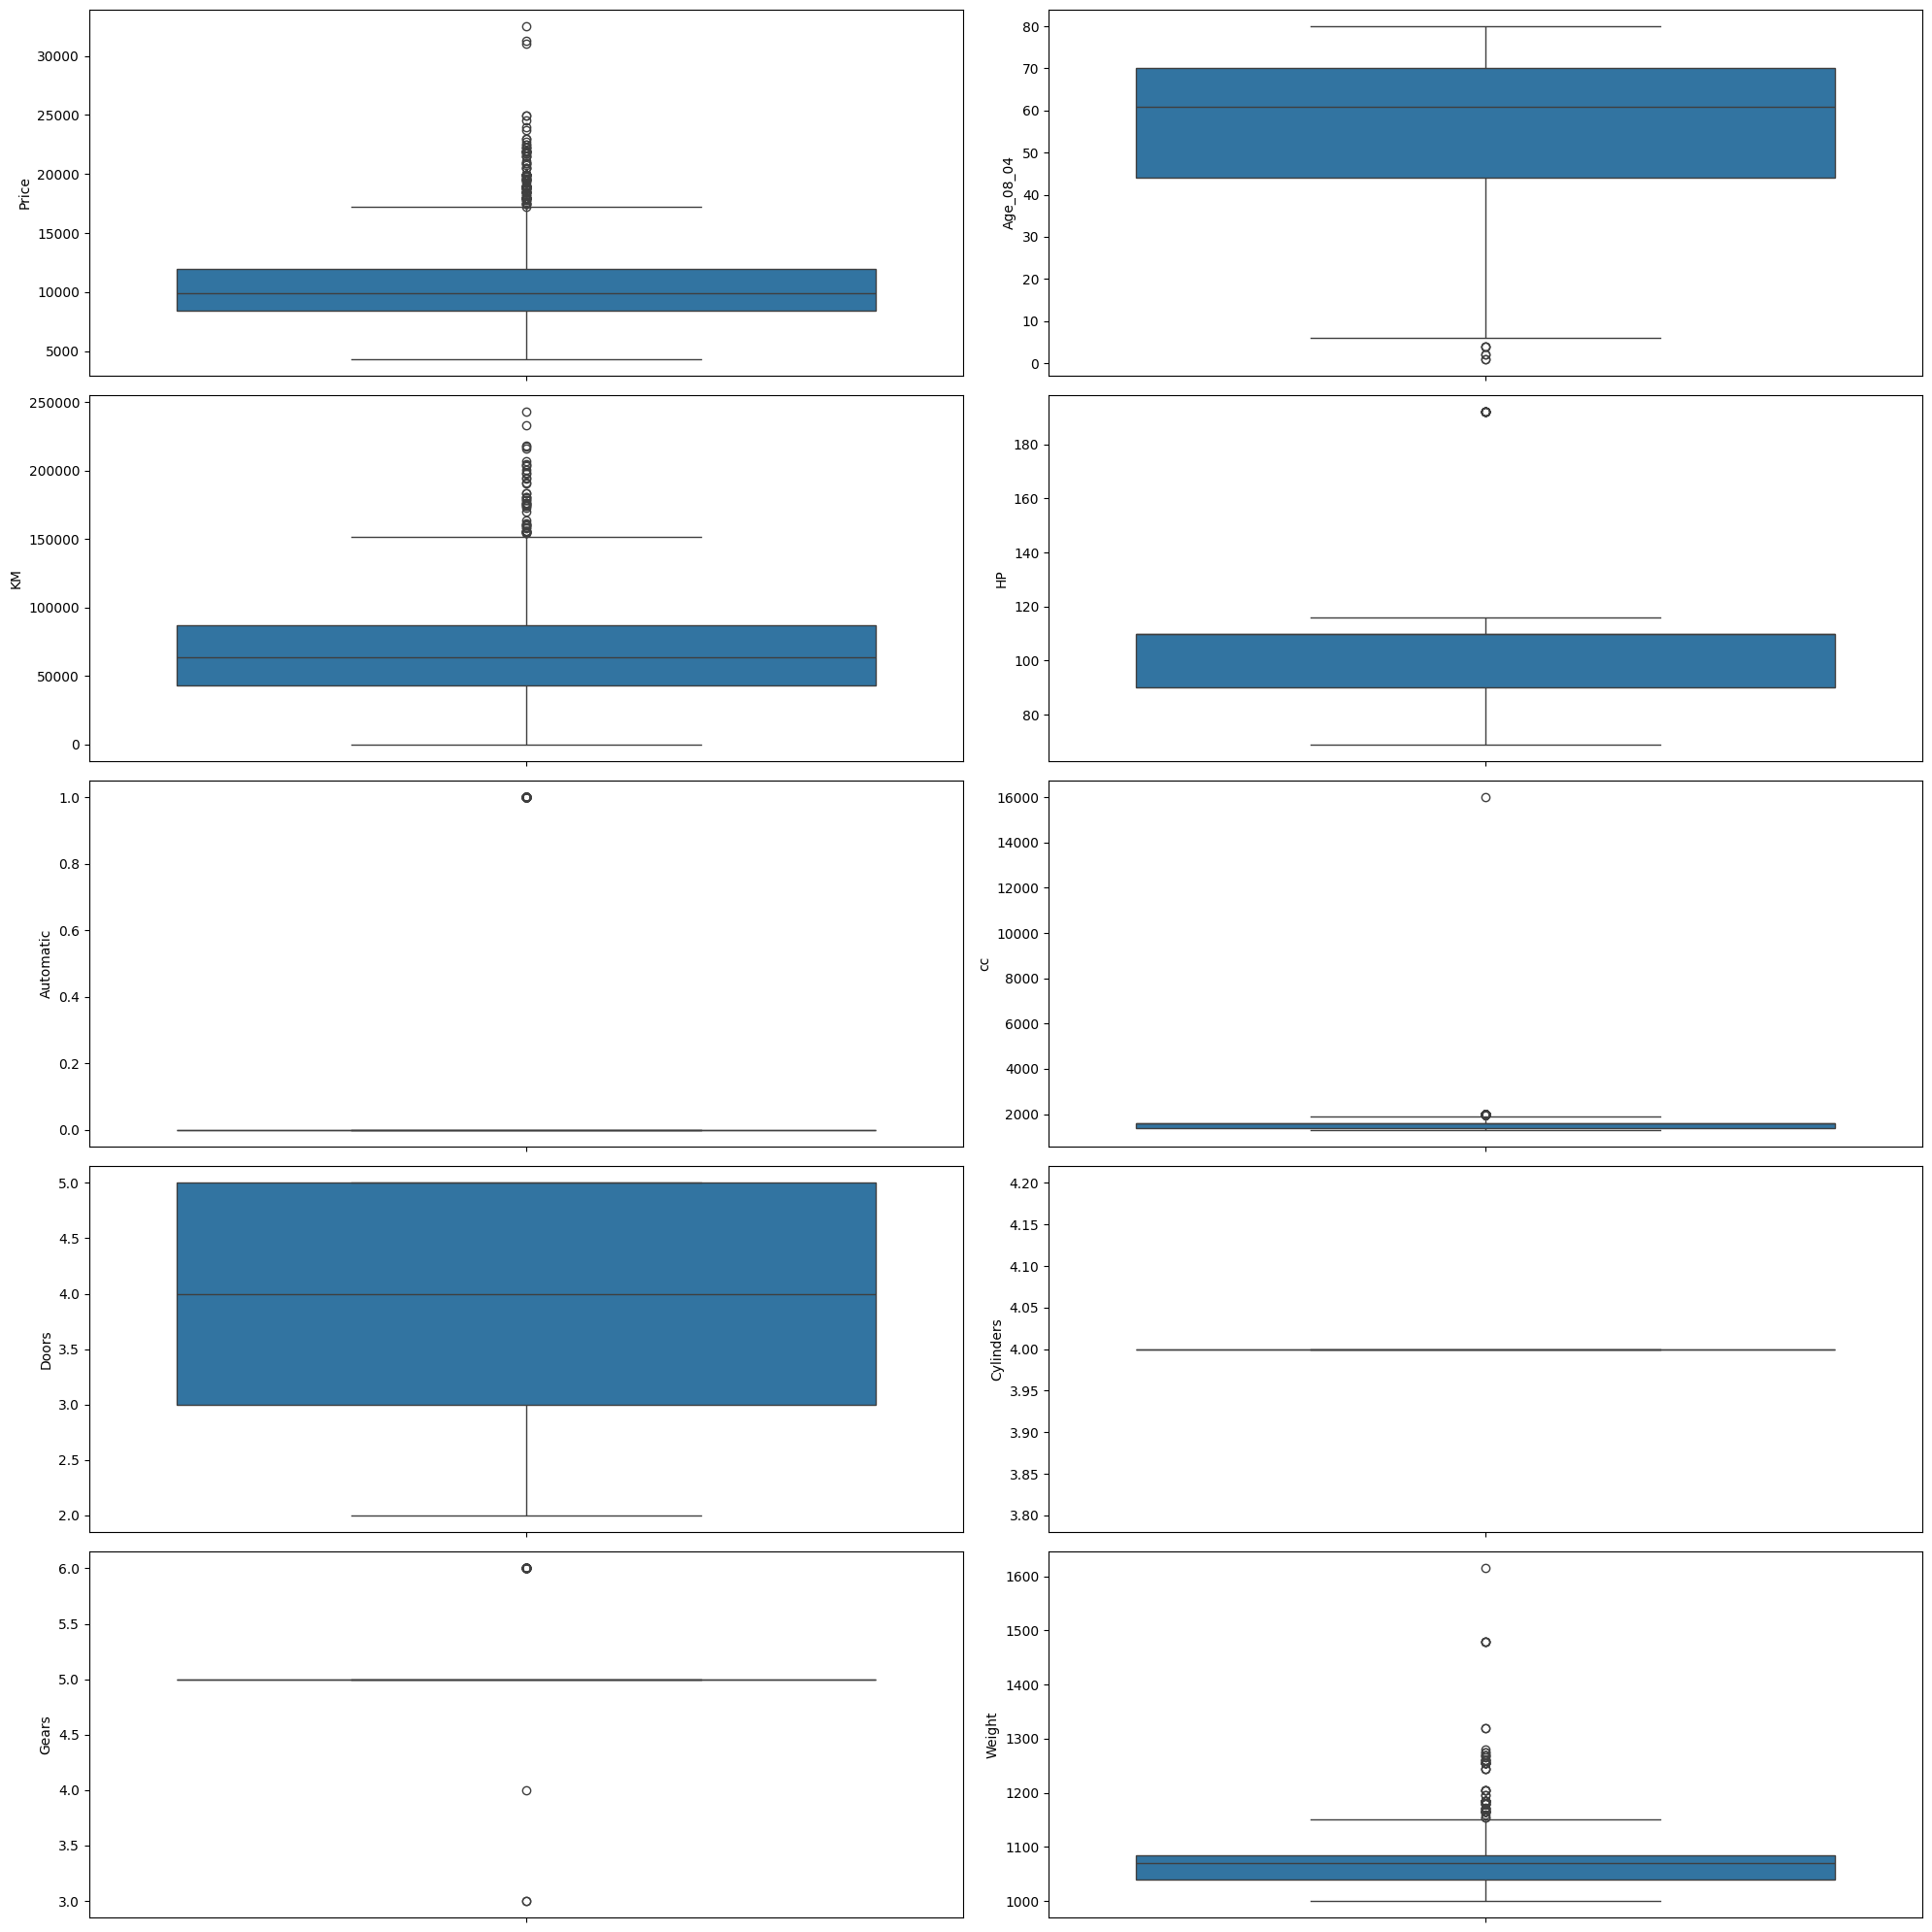

In [21]:
# displays the boxplots for all the numerical columns using subplots
fig,axes=plt.subplots(5,2,figsize=(20,20))
axes=axes.flatten()
for i,col in enumerate(num_col):
  sns.boxplot(df[col],ax=axes[i])
plt.tight_layout()
plt.show()

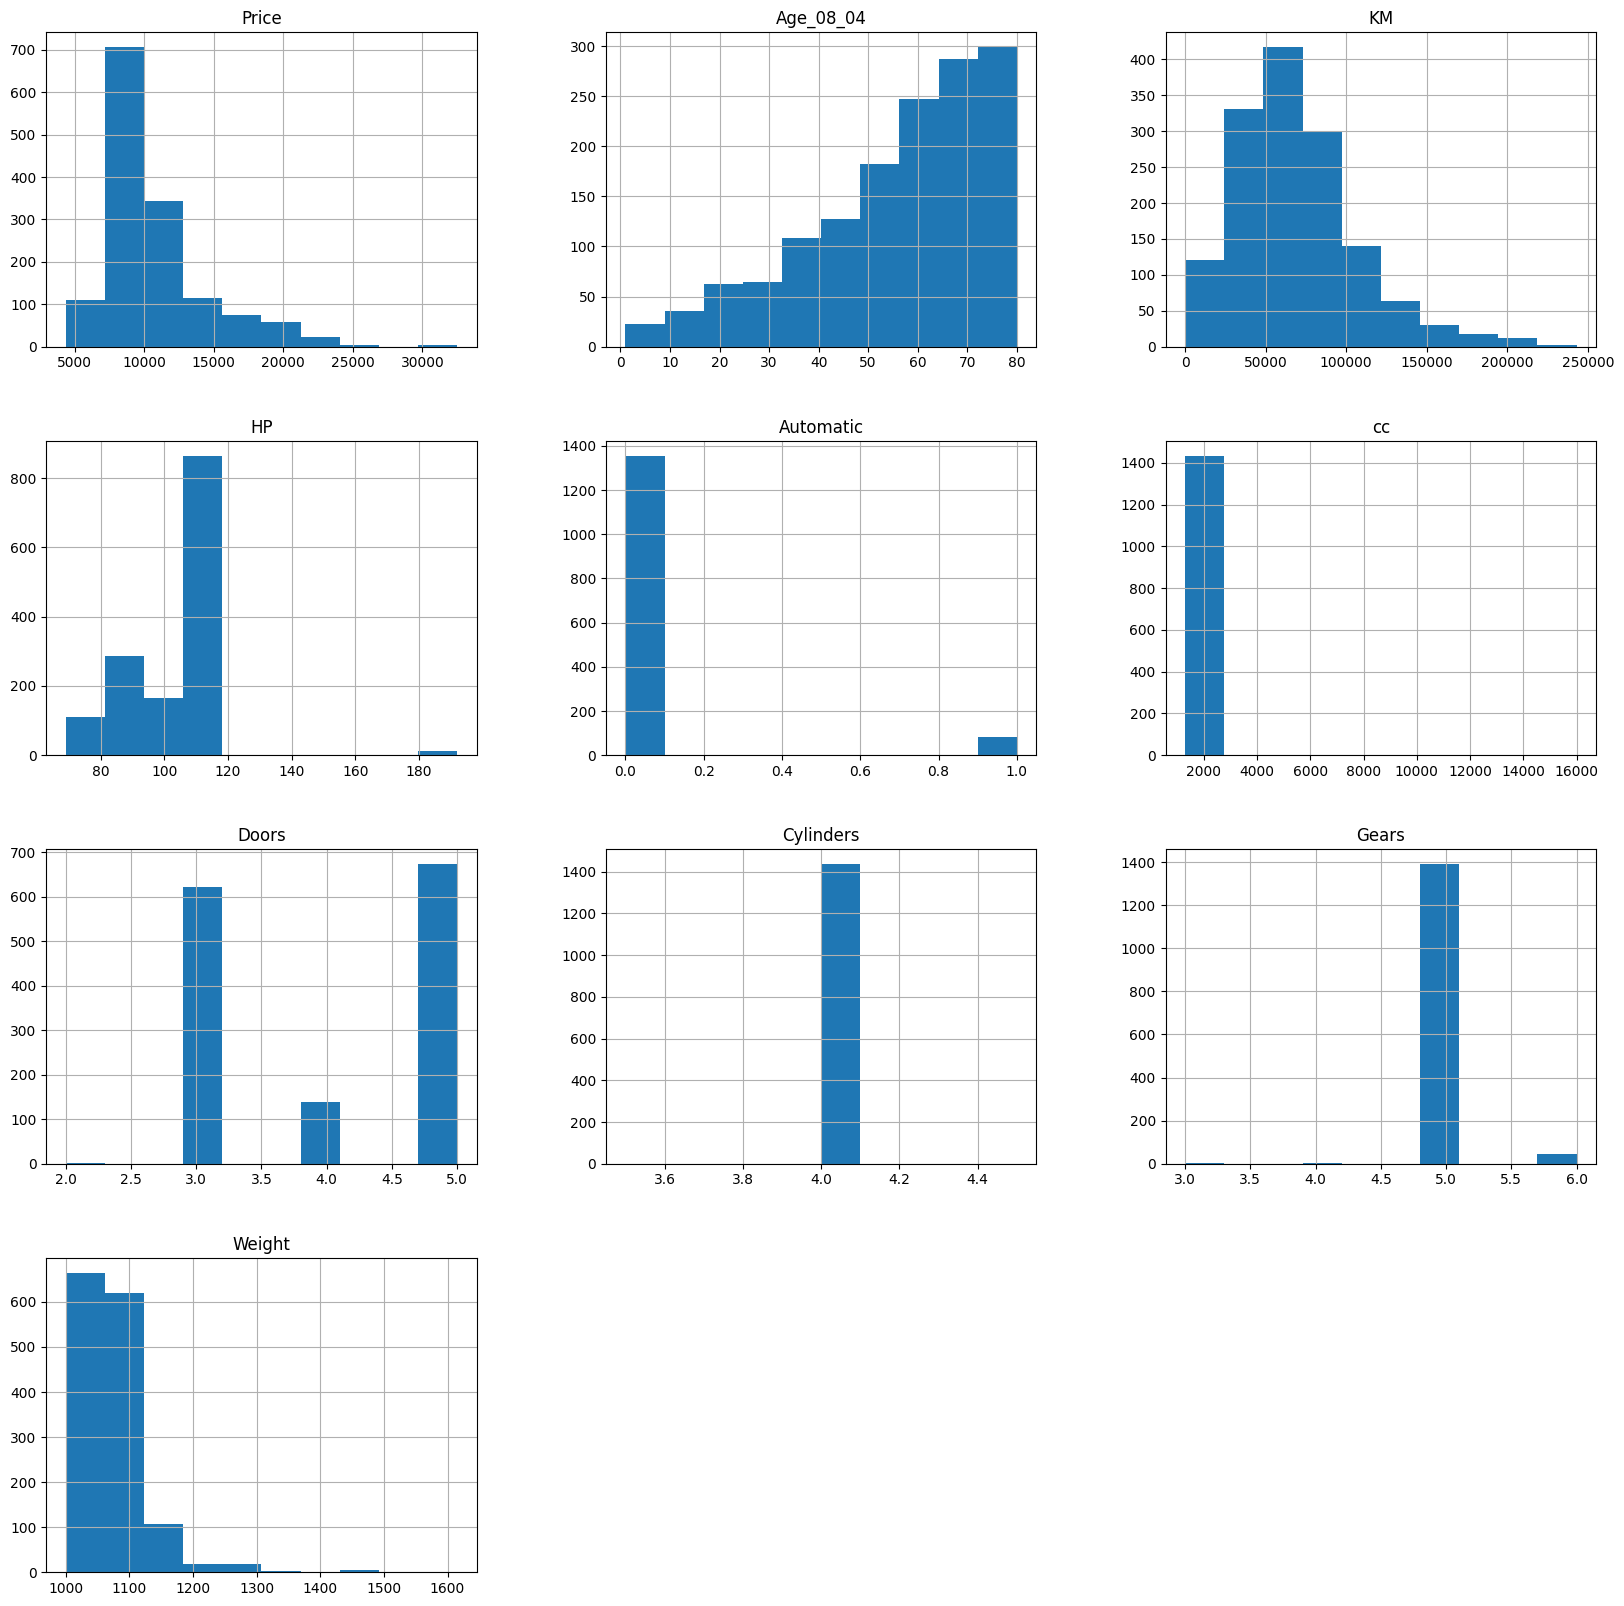

In [22]:
# plots the histogram for every column
df.hist(figsize=(20,20))
plt.show()


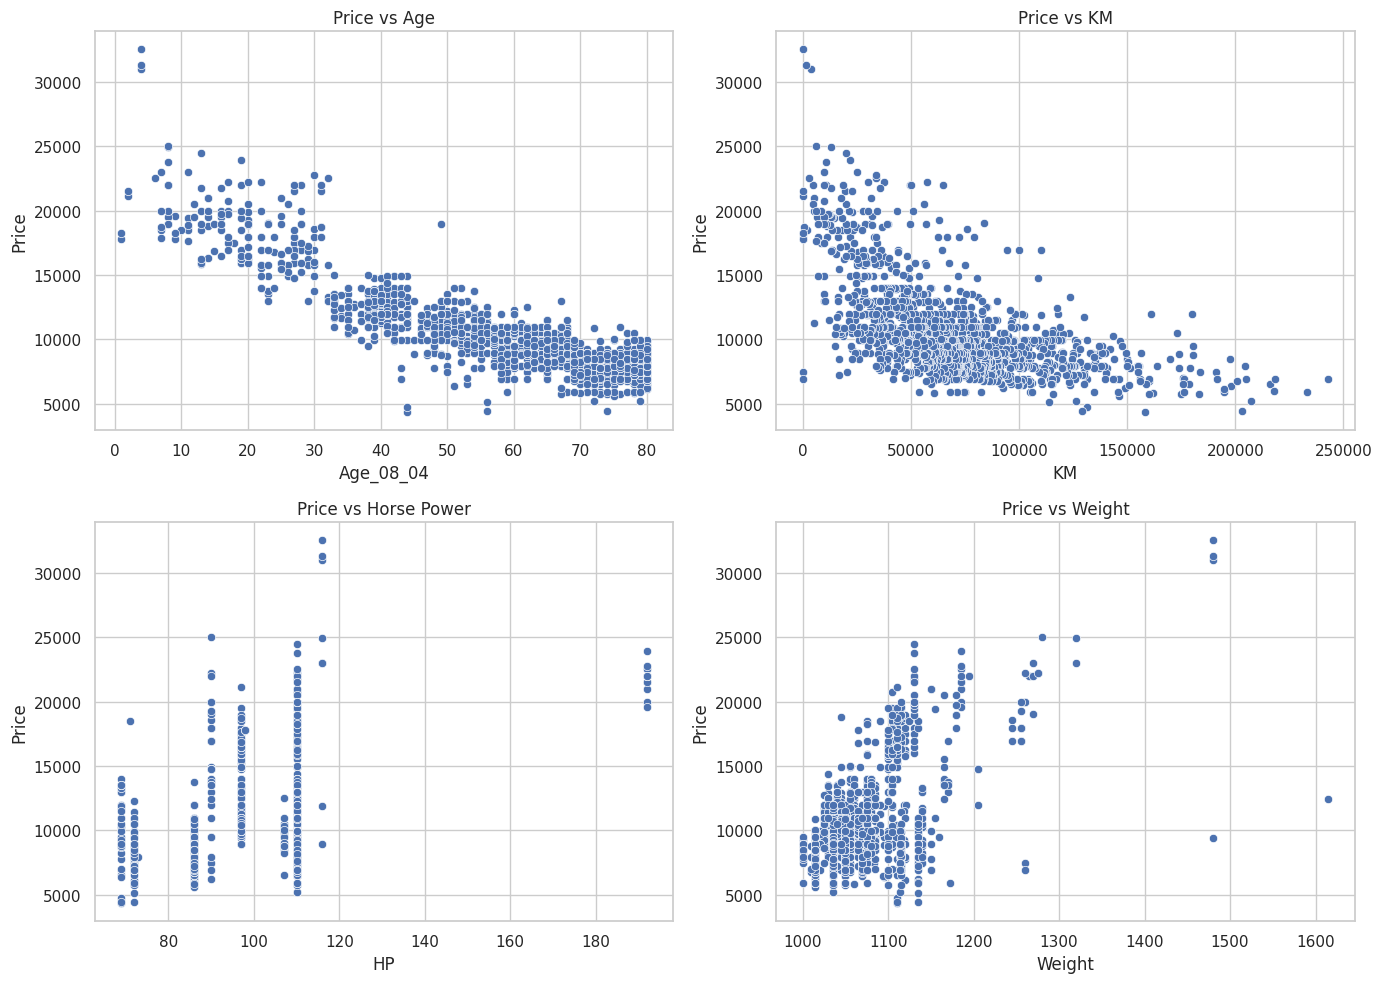

In [23]:
# Set plot style
sns.set(style="whitegrid")
# Visualizing relationships between important numerical features and Price
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Price vs Age
sns.scatterplot(x='Age_08_04', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs Age')
# Price vs KM
sns.scatterplot(x='KM', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs KM')
# Price vs HP
sns.scatterplot(x='HP', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Horse Power')
# Price vs Weight
sns.scatterplot(x='Weight', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs Weight')
plt.tight_layout()
plt.show()


In [24]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

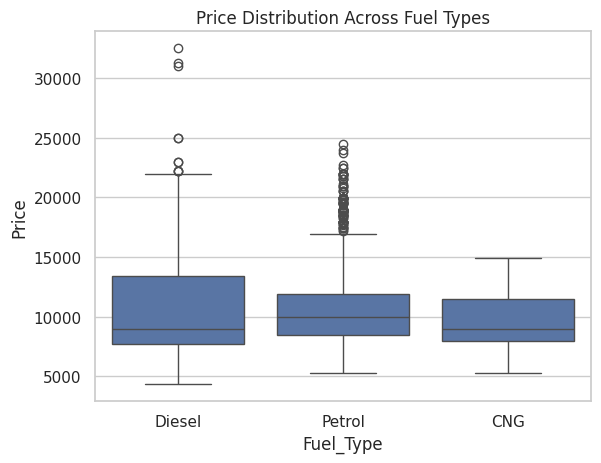

In [25]:
# plots the boxplot for the 'Fuel_Type' column
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price Distribution Across Fuel Types')
plt.show()


Data PreProcessing

In [26]:
# One-hot encoding for categorical columns
one_hot=OneHotEncoder()

In [27]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [28]:
df1=pd.DataFrame(one_hot.fit_transform(df[['Fuel_Type']]).toarray())


In [29]:
df1

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1430,0.0,0.0,1.0
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0


In [30]:
df2=df.join(df1)

In [31]:
df2.drop('Fuel_Type',axis=1,inplace=True)

In [32]:
df2.rename(columns={0:'Fuel_Type_CNG',1:'Fuel_Type_Diesel',2:'Fuel_Type_Petrol'},inplace=True)

In [33]:
df2=df2.drop(columns=['Cylinders'])

In [34]:
df2.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0
Fuel_Type_CNG,1


In [35]:
df2.dropna(inplace=True)

In [36]:
df2.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0
Fuel_Type_CNG,0


In [37]:
df2.duplicated().sum()

0

In [38]:
df2.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,3,5,1165,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,3,5,1165,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,3,5,1165,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,3,5,1170,0.0,1.0,0.0


In [39]:
df2.tail()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1430,8450,80,23000,86,0,1300,3,5,1015,0.0,0.0,1.0
1431,7500,69,20544,86,0,1300,3,5,1025,0.0,0.0,1.0
1432,10845,72,19000,86,0,1300,3,5,1015,0.0,0.0,1.0
1433,8500,71,17016,86,0,1300,3,5,1015,0.0,0.0,1.0
1434,7250,70,16916,86,0,1300,3,5,1015,0.0,0.0,1.0


In [40]:
corr=df2.corr()

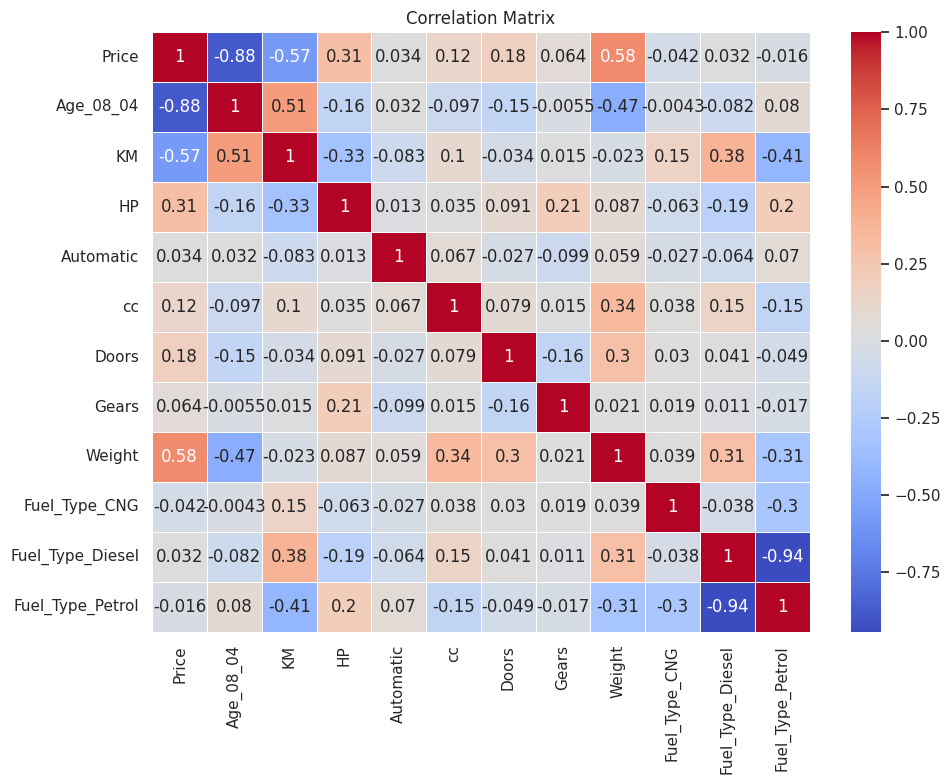

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm,linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##Splitting The Dataset

In [42]:
target=df2['Price']
target # Displays the target column

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,8450
1431,7500
1432,10845
1433,8500


In [43]:
features=df2.drop('Price',axis=1)
features #Displays the features column

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0.0,1.0,0.0
1,23,72937,90,0,2000,3,5,1165,0.0,1.0,0.0
2,24,41711,90,0,2000,3,5,1165,0.0,1.0,0.0
3,26,48000,90,0,2000,3,5,1165,0.0,1.0,0.0
4,30,38500,90,0,2000,3,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1430,80,23000,86,0,1300,3,5,1015,0.0,0.0,1.0
1431,69,20544,86,0,1300,3,5,1025,0.0,0.0,1.0
1432,72,19000,86,0,1300,3,5,1015,0.0,0.0,1.0
1433,71,17016,86,0,1300,3,5,1015,0.0,0.0,1.0


In [44]:
# Splits the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=40)

In [45]:
print(x_train.shape) # Prints x_train shape
print(x_test.shape) # Prints x_test shape
print(y_train.shape) # Prints y_train shape
print(y_test.shape) # Prints y_test shape

(1147, 11)
(287, 11)
(1147,)
(287,)


## Model Building

 Model 1

In [46]:
mlr_model=LinearRegression() # Creates the model

In [47]:
mlr_model.fit(x_train,y_train) #train the model

LinearRegression()

In [48]:
# Get the coefficients for each feature
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': mlr_model.coef_
})
# Display the coefficients
print(coefficients)


             Feature  Coefficient
0          Age_08_04  -127.219807
1                 KM    -0.018212
2                 HP    28.325897
3          Automatic   398.070008
4                 cc    -0.020054
5              Doors    17.236298
6              Gears   656.074387
7             Weight    16.240667
8      Fuel_Type_CNG  -402.251519
9   Fuel_Type_Diesel   153.591112
10  Fuel_Type_Petrol   248.660407


Model 2

In [49]:
x_train_2=x_train[['Age_08_04','KM','HP','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']]
x_test_2=x_test[['Age_08_04','KM','HP','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']]

In [50]:
mlr_model_2=LinearRegression()

In [51]:
mlr_model_2.fit(x_train_2,y_train)

LinearRegression()

In [52]:
# Get the coefficients for each feature
coefficients_model2 = pd.DataFrame({
    'Feature': x_train_2.columns,
    'Coefficient': mlr_model_2.coef_
})
# Display the coefficients
print(coefficients_model2)

            Feature  Coefficient
0         Age_08_04  -126.522027
1                KM    -0.018294
2                HP    30.112061
3            Weight    16.522264
4     Fuel_Type_CNG  -392.140356
5  Fuel_Type_Diesel   149.882623
6  Fuel_Type_Petrol   242.257734


Model 3

In [53]:
poly =PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [54]:
mlr_model_3=LinearRegression()

In [55]:
mlr_model_3.fit(x_train_poly,y_train)

LinearRegression()

In [56]:
# Get the coefficients for each feature
coefficients_model3 = pd.DataFrame({
    'Feature': poly.get_feature_names_out(x_train.columns), # get feature names from PolynomialFeatures
    'Coefficient': mlr_model_3.coef_
})
# Display the coefficients
print(coefficients_model3)

                                 Feature  Coefficient
0                                      1   190.075574
1                              Age_08_04     1.976795
2                                     KM    -2.741632
3                                     HP    -0.270948
4                              Automatic     0.068277
..                                   ...          ...
359     Fuel_Type_CNG Fuel_Type_Petrol^2     0.000000
360                   Fuel_Type_Diesel^3    -0.045539
361  Fuel_Type_Diesel^2 Fuel_Type_Petrol     0.000000
362  Fuel_Type_Diesel Fuel_Type_Petrol^2     0.000000
363                   Fuel_Type_Petrol^3     0.045700

[364 rows x 2 columns]


##Model Evaluation

Model 1

In [57]:
y_pred=mlr_model.predict(x_test) # Makes prediction

In [58]:
y_pred

array([ 8591.04592942,  7031.06146726,  8499.13089821,  8189.95683928,
       10832.03304451, 15987.87212249, 22178.56366283, 11687.27474367,
        8841.4915403 ,  9625.53596697, 15246.96892266,  7831.39367079,
        7110.62241302,  9003.85065077,  9575.35771508, 11562.47425188,
       11749.27120971, 10412.21338603, 13686.18497522,  7937.5930389 ,
        8372.5982838 , 11155.58185484,  9241.23060573, 11006.68138892,
       13587.90731549,  7382.37673761,  6651.46005853, 12767.15649673,
        8653.48345868, 21678.04057173,  6895.2367188 ,  8610.32347585,
        8290.93790054,  9205.63716126,  8368.82782525, 15745.09637291,
       13486.68923807, 10542.84087853,  6917.88704961, 10680.71632006,
       13291.14764117, 11637.86144592, 13800.17461982,  9460.47048761,
        8559.92082146, 25454.46252754,  9863.01707593,  9739.93702838,
       15978.61073083, 10928.89406039,  5821.04016226, 11045.38363821,
       12528.02912926, 11252.94525592, 11042.42283286,  8072.21962769,
      

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae) # prints the mae
print("Mean Squared Error:", mse) # prints mse
print("R-squared:", r2) # prints r2

Mean Absolute Error: 942.2384296129595
Mean Squared Error: 1482176.0739321734
R-squared: 0.8942185975776973


Model 2

In [60]:
y_pred_2=mlr_model_2.predict(x_test_2)

In [61]:
y_pred_2

array([ 8572.43884128,  7109.36002884,  8551.04684622,  8271.62636461,
       10812.31406911, 16023.86006466, 22279.61223111, 11693.52302825,
        8820.65788009,  9698.4217913 , 15251.7153279 ,  7912.71844206,
        7107.63948003,  9051.6856503 ,  9623.68407132, 11605.08635221,
       11753.25670351, 10445.13362835, 13329.96088689,  7942.43309412,
        8457.63304426, 11190.69199576,  9253.70013497, 11048.976077  ,
       13588.75232   ,  7460.4069573 ,  6673.05442194, 12789.08065602,
        8629.13447236, 21777.52421932,  6937.71481696,  8626.76337072,
        8298.31198463,  9253.46180905,  8435.67850749, 15777.00487798,
       13514.50914239, 10580.85452443,  6926.80043997, 10741.87297304,
       13312.89095777, 11693.35189248, 13830.67831186,  9507.08798339,
        8556.5569292 , 25598.53499265,  9930.61765873,  9770.41906287,
       16009.02937902, 10574.79325295,  5853.73772307, 10462.40768693,
       12553.96002448, 10931.80655562, 11070.55655075,  8125.44101051,
      

In [62]:
mae2 = mean_absolute_error(y_test, y_pred_2)
mse2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print("Mean Absolute Error:", mae) # prints mae
print("Mean Squared Error:", mse) # prints mse
print("R-squared:", r2) # prints r_square

Mean Absolute Error: 942.2384296129595
Mean Squared Error: 1482176.0739321734
R-squared: 0.8942185975776973


Model 3

In [63]:
y_pred_3=mlr_model_3.predict(x_test_poly)

In [64]:
y_pred_3

array([   8198.73318649,    7479.31854534,    8938.6157975 ,
          8225.43390835,   10269.82768234,   16715.38369427,
         26682.83946859,   11145.00741725,    8308.77312079,
          9409.5154666 ,   15507.37660682,    7875.23099618,
          8555.67827821,    9324.5494338 ,    9354.4767926 ,
         11384.62648923,   11206.83530967,   10173.53718979,
         13538.94218222,    8680.66169372,    8606.37297242,
         10606.32271964,    9175.06356346,   10449.21735705,
         12840.15271009,    7442.40877739,    7379.72025491,
         12105.40076808,    8656.1381344 ,   24644.40986131,
          7387.03057626,    8870.81278812,    8741.63222359,
          8918.22175649,   10263.23221636,   16104.88395422,
         12771.34155822,    9771.69304193,    7861.32358226,
          9374.48267519,   12294.07226416,   11362.45145006,
         13217.52463711,    9350.96898262,    8911.39001793,
         31850.97171128,    9644.60436273,    8618.60433367,
         16511.17700665,

In [65]:
mae3 = mean_absolute_error(y_test, y_pred_3)
mse3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print("Mean Absolute Error:", mae) # prints mae
print("Mean Squared Error:", mse) # prints mse
print("R-squared:", r2) # prints r_square

Mean Absolute Error: 942.2384296129595
Mean Squared Error: 1482176.0739321734
R-squared: 0.8942185975776973


##Lasso and Ridge

Model 1

In [66]:
# Initialize Lasso and Ridge models
lasso_model = Lasso(alpha=0.1)  # Alpha controls the strength of regularization
ridge_model = Ridge(alpha=0.1)
# Fit Lasso model on training data
lasso_model.fit(x_train, y_train)
# Fit Ridge model on training data
ridge_model.fit(x_train, y_train)
# Predict on the test set using both models
y_pred_lasso = lasso_model.predict(x_test)
y_pred_ridge = ridge_model.predict(x_test)
# Evaluate Lasso model
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
# Evaluate Ridge model
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
# Print Lasso evaluation metrics
print(f"Lasso Regression - MAE: {lasso_mae}, MSE: {lasso_mse}, R²: {lasso_r2}")
# Print Ridge evaluation metrics
print(f"Ridge Regression - MAE: {ridge_mae}, MSE: {ridge_mse}, R²: {ridge_r2}")


Lasso Regression - MAE: 942.1749300792826, MSE: 1482070.9681040621, R²: 0.8942260988739981
Ridge Regression - MAE: 942.2118132062518, MSE: 1482160.8212531419, R²: 0.8942196861459228


Model 2

In [67]:
lasso_model2 = Lasso(alpha=0.1)  # Alpha controls the strength of regularization
ridge_model2 = Ridge(alpha=0.1)
# Fit Lasso model on training data
lasso_model2.fit(x_train_2, y_train)
# Fit Ridge model on training data
ridge_model2.fit(x_train_2, y_train)
# Predict on the test set using both models
y_pred_lasso2 = lasso_model2.predict(x_test_2)
y_pred_ridge2 = ridge_model2.predict(x_test_2)

In [68]:
#Evaluate the lasso model
lasso_mae2 = mean_absolute_error(y_test, y_pred_lasso2)
lasso_mse2 = mean_squared_error(y_test, y_pred_lasso2)
lasso_r2_2 = r2_score(y_test, y_pred_lasso2)

In [69]:
# Evaluate ridge model
ridge_mae2 = mean_absolute_error(y_test, y_pred_ridge2)
ridge_mse2 = mean_squared_error(y_test, y_pred_ridge2)
ridge_r2_2 = r2_score(y_test, y_pred_ridge2)

In [70]:
print(f"Lasso Regression (Second Model) - MAE: {lasso_mae2}, MSE: {lasso_mse2}, R²: {lasso_r2_2}")
print(f"Ridge Regression (Second Model) - MAE: {ridge_mae2}, MSE: {ridge_mse2}, R²: {ridge_r2_2}")

Lasso Regression (Second Model) - MAE: 944.832316953863, MSE: 1501648.4219327732, R²: 0.8928288758596197
Ridge Regression (Second Model) - MAE: 944.8536600687883, MSE: 1501714.2484736545, R²: 0.8928241778861916


Model 3

In [71]:
lasso_model3 = Lasso(alpha=0.1)  # Alpha controls the strength of regularization
ridge_model3 = Ridge(alpha=0.1)
# Fit Lasso model on training data
lasso_model3.fit(x_train_poly, y_train)
# Fit Ridge model on training data
ridge_model3.fit(x_train_poly, y_train)
# Predict on the test set using both models
y_pred_lasso3 = lasso_model3.predict(x_test_poly)
y_pred_ridge3 = ridge_model3.predict(x_test_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.491e+08, tolerance: 1.462e+06
  model = cd_fast.enet_coordinate_descent(


In [72]:
#Evaluate lasso model
lasso_mae3 = mean_absolute_error(y_test, y_pred_lasso3)
lasso_mse3 = mean_squared_error(y_test, y_pred_lasso3)
lasso_r2_3 = r2_score(y_test, y_pred_lasso3)

In [73]:
# Evaluate ridge model
ridge_mae3 = mean_absolute_error(y_test, y_pred_ridge3)
ridge_mse3 = mean_squared_error(y_test, y_pred_ridge3)
ridge_r2_3 = r2_score(y_test, y_pred_ridge3)

In [74]:
print(f"Lasso Regression (Third Model) - MAE: {lasso_mae3}, MSE: {lasso_mse3}, R²: {lasso_r2_3}")
print(f"Ridge Regression (Third Model) - MAE: {ridge_mae3}, MSE: {ridge_mse3}, R²: {ridge_r2}_3")

Lasso Regression (Third Model) - MAE: 845.5793450227147, MSE: 1196070.0064212722, R²: 0.9146376973021597
Ridge Regression (Third Model) - MAE: 7976.899172581683, MSE: 5464039884.816869, R²: 0.8942196861459228_3


# Analysis

The code performs EDA to understand the data, preprocesses it for modeling, building the multiple multi linear regression models and evaluate their performances. It also applies Lasso and Ridge regrssion for regularization.

# Interview Questions

1. What is Normalization & Standardization and how is it helpful?

**Normalization**

Normalization is the process of rescaling the features of the data to be in a specific range, typically between 0 and 1. This helps ensure that no single feature dominates the learning process due to its larger scale.

Formula:
xnorm= x -xmin/xmax -xmin

Where:
x- original feature value

xmin and xmax are the minimum and maximum values of the feature.
  
Normalization is particularly useful when you know that the data has different units of measurement or when features have varying scales. For example, if one feature is measured in kilometers and another in years, normalizing the features ensures that no feature dominates because of its larger range.

**Standardization**

Standardization is the process of transforming your data to have a mean of 0 and a standard deviation of 1. This transformation centers the data and ensures that all features have the same variance.

Standardization is useful when the distribution of the data follows a normal distribution (Gaussian). It's particularly helpful for algorithms that assume normality (e.g., linear regression, logistic regression, KNN, SVM, etc.).

2. What techniques can be used to address multicollinearity in multiple linear regression?

**Multicollinearity** occurs when two or more independent variables in a multiple regression model are highly correlated. This can make it difficult to determine the individual effect of each variable on the dependent variable and can lead to unstable estimates of regression coefficients.

1. Remove Highly Correlated Features

Use a correlation matrix to identify which pairs of features are highly correlated. If two variables are highly correlated (say correlation > 0.8 or < -0.8), you can remove one of the variables to reduce multicollinearity.

2. Variance Inflation Factor (VIF)

VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 10 is usually considered a sign of multicollinearity.

3. Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms the original correlated features into a smaller set of uncorrelated features (principal components). By using PCA, you can eliminate multicollinearity while retaining most of the information from the original features.

4. Ridge Regression (L2 Regularization)

Ridge regression adds an L2 penalty (the sum of squared coefficients) to the cost function. This shrinks the coefficients of less important features and reduces the impact of multicollinearity without necessarily removing any variables.
Ridge regression stabilizes the coefficient estimates and makes them less sensitive to multicollinearity, as it forces the model to distribute the influence more evenly among correlated variables.

5. Lasso Regression (L1 Regularization)

Lasso regression adds an L1 penalty (the sum of the absolute values of coefficients) to the cost function. This can set some of the coefficients to zero, effectively performing feature selection and mitigating multicollinearity.
Lasso automatically drops less important features, which helps reduce the impact of multicollinearity by removing redundant variables.

6. Regularized ElasticNet Regression

ElasticNet combines L1 (Lasso) and L2 (Ridge) regularization. This method is particularly useful when there are multiple correlated variables, as it balances feature selection (L1) with coefficient shrinking (L2).